In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def prepross(data):
    return data[['Date','Price']]
    

data = pd.read_csv('final_test.csv')
data = prepross(data)
##data.set_index('Date', inplace = True)

In [2]:
data.head()

,Date,Price
0,2017-01-02,13.99
1,2017-08-22,13.99
2,2017-09-21,13.99
3,2018-01-22,13.99
4,2018-05-14,13.99


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data.set_index('Date', inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2017-01-02 to 2021-12-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


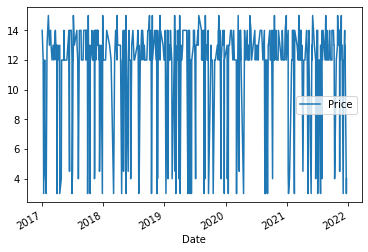

In [6]:
data.plot();

<AxesSubplot:xlabel='Date'>

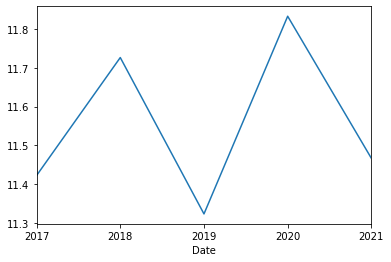

In [7]:
data['Price'].resample(rule='AS').mean().plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [9]:
adfuller_test(data)

ADF Test Statistic : -3.295062157135502
p-value : 0.015100644199636797
#Lags Used : 0
Number of Observations Used : 499
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

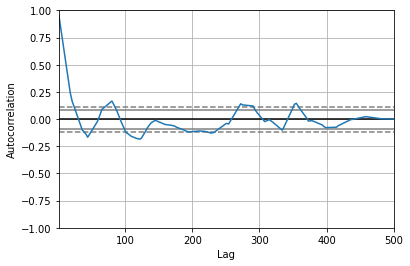

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Price'])

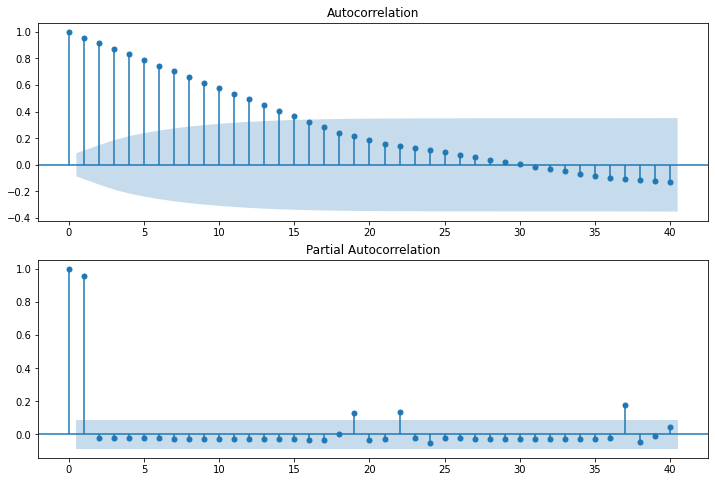

In [11]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(data['Price'], lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(data['Price'], lags=40,ax=ax2)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Price'],order=(1,1,1))
model_fit=model.fit()


c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\rohan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
model_fit.summary()


In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Price','forecast']].plot(figsize=(12,8))